# Importing Dependencies

In [1]:
import pandas as pd
import re
from textblob import TextBlob

# PIPELINE FOR ENVIRONMENTAL ISSUES

### Loading the Datasets to Pandas DataFrame

In [2]:
data1 = pd.read_csv('2008-2014 Noise.csv')
data2 = pd.read_csv('2015-2019 Noise.csv')

data1.head(3).transpose()
data2.head(3).transpose()  # Comment one to show the other. 

,0,1,2
date,2019-07-08 20:44:35,2019-07-08 13:23:19,2019-07-08 13:14:08
username,Titian73,ReneelaIceCream,mrs_wee
to,NaN,btweverse,NaN
replies,0,0,0
retweets,0,0,0
favorites,0,1,0
text,#eysummerparty i just downgraded my room to ge...,Pls ignore the background noise lmao pic.twitt...,I video-call husband and there are three girls...
geo,NaN,NaN,NaN
mentions,NaN,NaN,NaN
hashtags,#eysummerparty,NaN,NaN


### Concatenating Overall DataFrames 

In [3]:
noisedf = pd.concat([data1, data2], sort=True)
noisedf.head(3).transpose()

,0,1,2
date,2014-12-27 14:36:23,2014-12-18 18:31:44,2014-12-15 23:25:09
favorites,0,0,0
geo,NaN,NaN,NaN
hashtags,#Kowloon #ExoticFood #HongKong,#iPad,#oos #oosmusic #edm #hk #hongkong
id,548849879263748096,545647617422532608,544634294019174400
mentions,@Kowloon,@freakonomics,NaN
permalink,https://twitter.com/svetothefool/status/548849...,https://twitter.com/happywaiman/status/5456476...,https://twitter.com/swed_official/status/54463...
replies,0,0,0
retweets,0,0,0
text,Kowloon food. Noise louder than taste. yummy a...,@freakonomics I always thought that what #iPad...,Pls leave me alone and let me think about all ...


# Exploratory Data Analysis

In [4]:
# Dropping irrelevant columns 

noisedf = noisedf.drop(['geo', 'id', 'permalink'], axis=1)

noisedf.head(3).transpose()

,0,1,2
date,2014-12-27 14:36:23,2014-12-18 18:31:44,2014-12-15 23:25:09
favorites,0,0,0
hashtags,#Kowloon #ExoticFood #HongKong,#iPad,#oos #oosmusic #edm #hk #hongkong
mentions,@Kowloon,@freakonomics,NaN
replies,0,0,0
retweets,0,0,0
text,Kowloon food. Noise louder than taste. yummy a...,@freakonomics I always thought that what #iPad...,Pls leave me alone and let me think about all ...
to,NaN,NaN,NaN
username,svetothefool,happywaiman,swed_official


In [5]:
noisedf['date'] = pd.to_datetime(noisedf['date'])

noisedf.dtypes

date         datetime64[ns]
favorites             int64
hashtags             object
mentions             object
replies               int64
retweets              int64
text                 object
to                   object
username             object
dtype: object

# Emotion AI / Sentiment Analysis Begins Here

## Initializing TextBlob Library

## Scripting Custom Helper Functions to Help Clean the Tweets and HashTags

In [6]:
def clean_tweet(tweet):   
    return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t]) |(\w+:\/\/\S+)*_#:.?", " ", tweet).split())


def clean_hashtags(hashtag): 
    
    return ' '.join(re.sub("#", " ", hashtag).split())

def get_tweet_sentiment(tweet):
        '''
        Utility function to classify sentiment of passed tweet
        using textblob's sentiment method
        '''
        # create TextBlob object of passed tweet text
        analysis = TextBlob(clean_tweet(tweet))
        # set sentiment
        if analysis.sentiment.polarity > 0:
            return 'positive'
        elif analysis.sentiment.polarity == 0:
            return 'neutral'
        else:
            return 'negative'
  


## Apply the Custom Functions to Create New Columns to be Added to the DataFrame 

In [7]:
noisedf['tweet_clean'] = noisedf.text.apply(clean_tweet) 
noisedf.head(3).transpose()   # Visualising the first five rows of the Dataset
noisedf['tweet_sentiment'] = noisedf.tweet_clean.apply(get_tweet_sentiment)     # Adding the Sentiments Column to Tweets
#noisedf['hashtag_sentiment'] = noisedf.hashtag_clean.apply(get_tweet_sentiment)

noisedf.head().transpose()

,0,1,2,3,4
date,2014-12-27 14:36:23,2014-12-18 18:31:44,2014-12-15 23:25:09,2014-12-10 11:57:30,2014-11-29 18:11:45
favorites,0,0,0,0,0
hashtags,#Kowloon #ExoticFood #HongKong,#iPad,#oos #oosmusic #edm #hk #hongkong,NaN,NaN
mentions,@Kowloon,@freakonomics,NaN,@psychicteeth @KommanderKlobb,NaN
replies,0,0,0,0,0
retweets,0,0,0,0,0
text,Kowloon food. Noise louder than taste. yummy a...,@freakonomics I always thought that what #iPad...,Pls leave me alone and let me think about all ...,@psychicteeth @KommanderKlobb *whip noise* YEAH,We can't put it aside. The noise here is prett...
to,NaN,NaN,NaN,psychicteeth,NaN
username,svetothefool,happywaiman,swed_official,devbradmarr,Akinjiola
tweet_clean,Kowloon food Noise louder than taste yummy any...,I always thought that what #iPad and noise can...,Pls leave me alone and let me think about all ...,*whip noise YEAH,We can't put it aside The noise here is pretty...


# WASTE

In [8]:
data1 = pd.read_csv('data/2008-2014 Waste.csv')
data2 = pd.read_csv('data/2015-2019 Waste.csv')

data1.head(2).transpose()
data2.head(2).transpose()  # Comment one to show the other. 

,0,1
date,2019-07-08 17:43:46,2019-07-08 16:08:54
username,cutiesealion,Waifuplug
to,Taozhi_YaoYao,mindnevermatter
replies,0,1
retweets,0,0
favorites,1,2
text,How come I see people jumping onto moral high ...,True but they all feel like the right relation...
geo,NaN,NaN
mentions,NaN,NaN
hashtags,NaN,NaN


In [9]:
wastedf = pd.concat([data1, data2], sort=True)
wastedf = wastedf.drop(['geo', 'id', 'permalink'], axis=1)

def clean_tweet(tweet):    
    
    return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t]) |(\w+:\/\/\S+)*_#:.?", " ", tweet).split())

def clean_hashtags(hashtag):
    
    return ' '.join(re.sub("#", " ", hashtag).split())

def get_tweet_sentiment(tweet):
    
    # create TextBlob object of passed tweet text
        analysis = TextBlob(clean_tweet(tweet))
        # set sentiment
        if analysis.sentiment.polarity > 0:
            return 'positive'
        elif analysis.sentiment.polarity == 0:
            return 'neutral'
        else:
            return 'negative'
        

wastedf['tweet_clean'] = wastedf.text.apply(clean_tweet)   
#wastedf['hashtag_clean'] = wastedf.hashtags.astype('str').apply(clean_hashtags)
wastedf['tweet_sentiment'] = wastedf.tweet_clean.apply(get_tweet_sentiment) 
#wastedf['hashtag_sentiment'] = wastedf.hashtag_clean.apply(get_tweet_sentiment)

wastedf.head(3).transpose()

,0,1,2
date,2014-12-22 11:37:22,2014-12-21 13:48:01,2014-12-21 08:28:06
favorites,0,0,0
hashtags,#KayRoItsComplicated,NaN,#springworkshop_hkfarm #wongchukhang #hongkong
mentions,NaN,@tumblrkowts,@Spring
replies,0,0,0
retweets,1,0,0
text,"Don't waste your time on him, if he won't give...",“ @tumblrkowts: if you're lucky enough to get ...,Coffee ground and juice waste from Mum cafe #s...
to,NaN,tumblrkowts,NaN
username,villavicenci0j,jairaalyssa,Studio_Leung
tweet_clean,Don't waste your time on him if he won't give ...,if you're lucky enough to get a second chance ...,Coffee ground and juice waste from Mum cafe #s...


In [10]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

sentenc = encoder.fit_transform(noisedf['tweet_sentiment'])
#hashenc = encoder.fit_transform(noisedf['hashtag_sentiment'])
noisedf['noise_enc'] = sentenc
# noisedf['hash_enc'] = hashenc


encoder = LabelEncoder()

wastenc = encoder.fit_transform(wastedf['tweet_sentiment'])
# hashenc = encoder.fit_transform(wastedf['hashtag_sentiment'])
wastedf['waste_enc'] = wastenc
# wastedf['hash_enc'] = hashenc

#### wastedf.head(7).transpose()
# noisedf.drop('sentwaste', axis=1, inplace=True)
noisedf.head(3).transpose()

In [16]:
wastedf['date'] = pd.to_datetime(wastedf['date'])

wastedf.dtypes

date               datetime64[ns]
favorites                   int64
hashtags                   object
mentions                   object
replies                     int64
retweets                    int64
text                       object
to                         object
username                   object
tweet_clean                object
tweet_sentiment            object
waste_enc                   int64
dtype: object

In [17]:
noisedf.index = noisedf['date']
wastedf.index = wastedf['date']

del noisedf['date']
del wastedf['date']

In [18]:
noisedf.head().transpose()

date,2014-12-27 14:36:23,2014-12-18 18:31:44,2014-12-15 23:25:09,2014-12-10 11:57:30,2014-11-29 18:11:45
favorites,0,0,0,0,0
hashtags,#Kowloon #ExoticFood #HongKong,#iPad,#oos #oosmusic #edm #hk #hongkong,NaN,NaN
mentions,@Kowloon,@freakonomics,NaN,@psychicteeth @KommanderKlobb,NaN
replies,0,0,0,0,0
retweets,0,0,0,0,0
text,Kowloon food. Noise louder than taste. yummy a...,@freakonomics I always thought that what #iPad...,Pls leave me alone and let me think about all ...,@psychicteeth @KommanderKlobb *whip noise* YEAH,We can't put it aside. The noise here is prett...
to,NaN,NaN,NaN,psychicteeth,NaN
username,svetothefool,happywaiman,swed_official,devbradmarr,Akinjiola
tweet_clean,Kowloon food Noise louder than taste yummy any...,I always thought that what #iPad and noise can...,Pls leave me alone and let me think about all ...,*whip noise YEAH,We can't put it aside The noise here is pretty...
tweet_sentiment,neutral,neutral,neutral,neutral,positive


In [19]:
noisedf.dtypes

favorites           int64
hashtags           object
mentions           object
replies             int64
retweets            int64
text               object
to                 object
username           object
tweet_clean        object
tweet_sentiment    object
noise_enc           int64
dtype: object

In [20]:


import seaborn as sns
sns.set(rc={'figure.figsize':(25, 5)});

noisedf['noise_enc'].plot(linewidth=1.5);
#wastedf['waste_enc'].plot(linewidth=1.5);




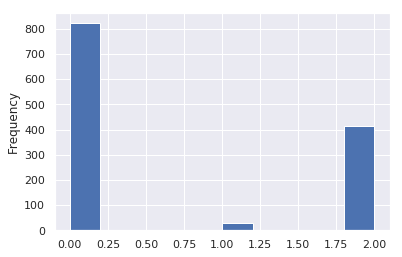

In [21]:
wastedf['waste_enc'].plot(kind='hist');

In [ ]:
# Idea! Recode the data to aid visibility

In [23]:
noisedf.noise_enc.value_counts()

1    377
2    358
0    141
Name: noise_enc, dtype: int64

In [24]:
noisedf.head(3).transpose()

date,2014-12-27 14:36:23,2014-12-18 18:31:44,2014-12-15 23:25:09
favorites,0,0,0
hashtags,#Kowloon #ExoticFood #HongKong,#iPad,#oos #oosmusic #edm #hk #hongkong
mentions,@Kowloon,@freakonomics,NaN
replies,0,0,0
retweets,0,0,0
text,Kowloon food. Noise louder than taste. yummy a...,@freakonomics I always thought that what #iPad...,Pls leave me alone and let me think about all ...
to,NaN,NaN,NaN
username,svetothefool,happywaiman,swed_official
tweet_clean,Kowloon food Noise louder than taste yummy any...,I always thought that what #iPad and noise can...,Pls leave me alone and let me think about all ...
tweet_sentiment,neutral,neutral,neutral


In [25]:
vals_to_replace = {0:'-1', 1:'0', 2:'1'}

In [26]:
noisedf['noise_enc1'] = noisedf['noise_enc'].map(vals_to_replace)

In [27]:
noisedf.head().transpose()

date,2014-12-27 14:36:23,2014-12-18 18:31:44,2014-12-15 23:25:09,2014-12-10 11:57:30,2014-11-29 18:11:45
favorites,0,0,0,0,0
hashtags,#Kowloon #ExoticFood #HongKong,#iPad,#oos #oosmusic #edm #hk #hongkong,NaN,NaN
mentions,@Kowloon,@freakonomics,NaN,@psychicteeth @KommanderKlobb,NaN
replies,0,0,0,0,0
retweets,0,0,0,0,0
text,Kowloon food. Noise louder than taste. yummy a...,@freakonomics I always thought that what #iPad...,Pls leave me alone and let me think about all ...,@psychicteeth @KommanderKlobb *whip noise* YEAH,We can't put it aside. The noise here is prett...
to,NaN,NaN,NaN,psychicteeth,NaN
username,svetothefool,happywaiman,swed_official,devbradmarr,Akinjiola
tweet_clean,Kowloon food Noise louder than taste yummy any...,I always thought that what #iPad and noise can...,Pls leave me alone and let me think about all ...,*whip noise YEAH,We can't put it aside The noise here is pretty...
tweet_sentiment,neutral,neutral,neutral,neutral,positive


In [28]:
V = noisedf['noise_enc1'].astype('float64')
noisedf['noise_enc1'] = V

In [65]:
import matplotlib.pyplot as plt
plt.close('all')

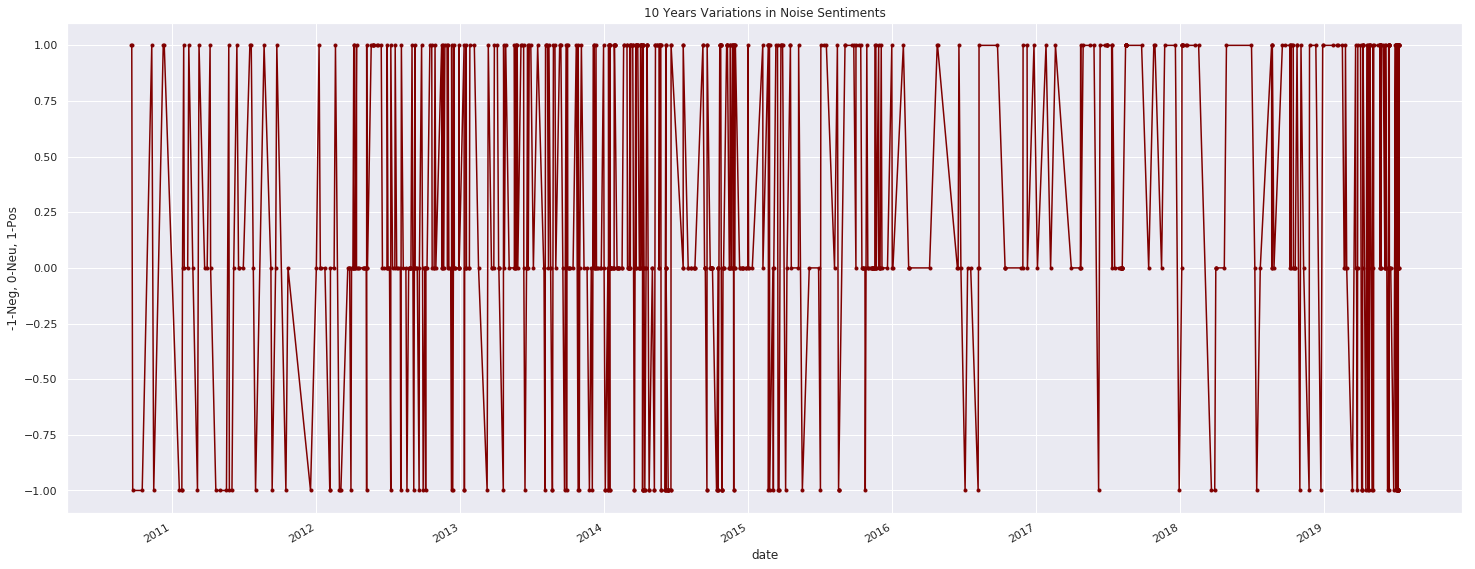

In [113]:
import seaborn as sns
sns.set(rc={'figure.figsize':(25, 15)});

ax = noisedf.noise_enc1.plot(linewidth=1.5, figsize=(25, 10), color='maroon', marker='.',
                             title='10 Years Variations in Noise Sentiments');
ax.set_ylabel('-1-Neg, 0-Neu, 1-Pos');

plt.savefig('all the years.png')

import seaborn as sns
sns.set(rc={'figure.figsize':(25, 2)});

ax = noisedf.noise_enc1.plot(linewidth=1.5, figsize=(25, 2), columns);


plt.savefig('fefe.png')

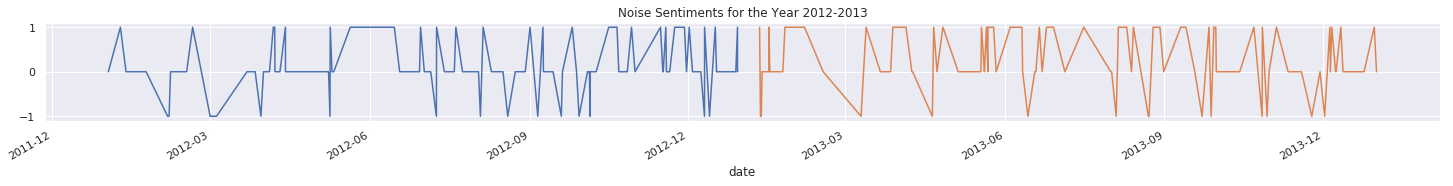

In [106]:
noisedf.loc['2012', 'noise_enc1'].plot()
noisedf.loc['2013', 'noise_enc1'].plot() 
#noisedf.loc['2014', 'noise_enc'].plot() 
plt.title('Noise Sentiments for the Year 2012-2013')
plt.savefig('noise_sent 2012-13.png')
ax.set_ylabel('Tweets 0-Neg, 1-Pos, 2-Neu');
ax.set_ylabel('Tweets 0-Neg, 1-Pos, 2-Neu');

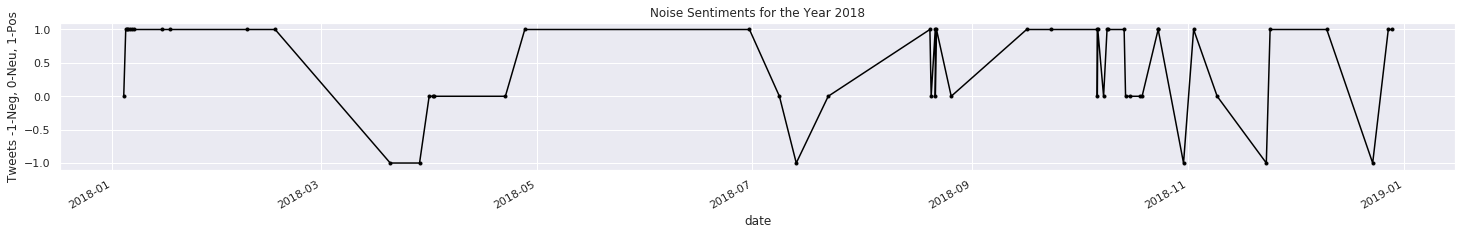

In [102]:
ax = noisedf.loc['2018', 'noise_enc1'].plot(color='black', marker='.', figsize=(25, 3), 
                                           title = 'Noise Sentiments for the Year 2018')
#ax = plt.plot(noisedf.loc['2015', 'noise_enc1']), #plt.plot(noisedf.loc['2013', 'noise_enc1']);
#plt.plot(noisedf.loc['2013', 'noise_enc']);
ax.set_ylabel('Tweets -1-Neg, 0-Neu, 1-Pos');
plt.savefig('noise_sentiments - 2018.png')
#plt.close('all')

In [32]:
wastedf.head().transpose()

date,2014-12-22 11:37:22,2014-12-21 13:48:01,2014-12-21 08:28:06,2014-12-19 08:40:27,2014-12-11 04:31:35
favorites,0,0,0,0,0
hashtags,#KayRoItsComplicated,NaN,#springworkshop_hkfarm #wongchukhang #hongkong,NaN,#DontFlyJetstar
mentions,NaN,@tumblrkowts,@Spring,@darrenaticsMAC1 @900Madrona,@JetstarAirways
replies,0,0,0,1,1
retweets,1,0,0,0,0
text,"Don't waste your time on him, if he won't give...",“ @tumblrkowts: if you're lucky enough to get ...,Coffee ground and juice waste from Mum cafe #s...,@darrenaticsMAC1 @900Madrona don't waste our t...,@JetstarAirways Waste of Time and Waste of Mon...
to,NaN,tumblrkowts,NaN,OMerciales,NaN
username,villavicenci0j,jairaalyssa,Studio_Leung,OMerciales,carileee
tweet_clean,Don't waste your time on him if he won't give ...,if you're lucky enough to get a second chance ...,Coffee ground and juice waste from Mum cafe #s...,don't waste our tweet Pls vote.DarrenTheTotal ...,Waste of Time and Waste of Money #DontFlyJetst...
tweet_sentiment,positive,positive,negative,negative,negative


In [33]:
vals_to_replace = {0:'-1', 1:'0', 2:'1'}
wastedf['waste_enc1'] = wastedf['waste_enc'].map(vals_to_replace)


In [34]:
wastedf.head().transpose()

date,2014-12-22 11:37:22,2014-12-21 13:48:01,2014-12-21 08:28:06,2014-12-19 08:40:27,2014-12-11 04:31:35
favorites,0,0,0,0,0
hashtags,#KayRoItsComplicated,NaN,#springworkshop_hkfarm #wongchukhang #hongkong,NaN,#DontFlyJetstar
mentions,NaN,@tumblrkowts,@Spring,@darrenaticsMAC1 @900Madrona,@JetstarAirways
replies,0,0,0,1,1
retweets,1,0,0,0,0
text,"Don't waste your time on him, if he won't give...",“ @tumblrkowts: if you're lucky enough to get ...,Coffee ground and juice waste from Mum cafe #s...,@darrenaticsMAC1 @900Madrona don't waste our t...,@JetstarAirways Waste of Time and Waste of Mon...
to,NaN,tumblrkowts,NaN,OMerciales,NaN
username,villavicenci0j,jairaalyssa,Studio_Leung,OMerciales,carileee
tweet_clean,Don't waste your time on him if he won't give ...,if you're lucky enough to get a second chance ...,Coffee ground and juice waste from Mum cafe #s...,don't waste our tweet Pls vote.DarrenTheTotal ...,Waste of Time and Waste of Money #DontFlyJetst...
tweet_sentiment,positive,positive,negative,negative,negative


In [36]:
w = wastedf['waste_enc1'].astype('float64')
wastedf['waste_enc1'] = w

In [41]:
import matplotlib.pyplot as plt

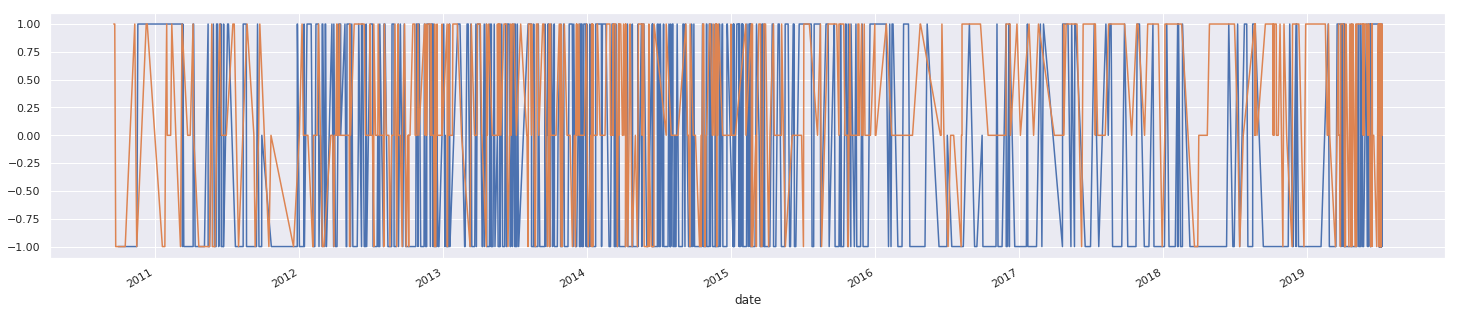

In [44]:
wastedf.waste_enc1.plot(linewidth=1.5, figsize=(25, 5));
noisedf.noise_enc1.plot(linewidth=1.5, figsize=(25, 5));
plt.savefig('dfd.png')